In [18]:
import pykoop
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns
import sklearn
import pysindy as ps
from tools import plot_main, plot_clustered_kuramoto, generate_kuramoto_cluster_data_sin_cos

# 数据生成

In [129]:
N=12
n_clusters=3  # 团数
K_intra=5
K_inter=0.1
noise=0.001
dt=0.002

In [116]:
T=1
batch = 10000
t_list = []
x_data = []
for seed in range(batch):
    x_train, theta_hist, t, K_matrix = generate_kuramoto_cluster_data_sin_cos(
        N=N, n_clusters=n_clusters, K_intra=K_intra, K_inter=K_inter, dt=dt, T=T, noise=noise, random_state=seed
    )
    x_data.append(x_train)
    t_list.append(t)

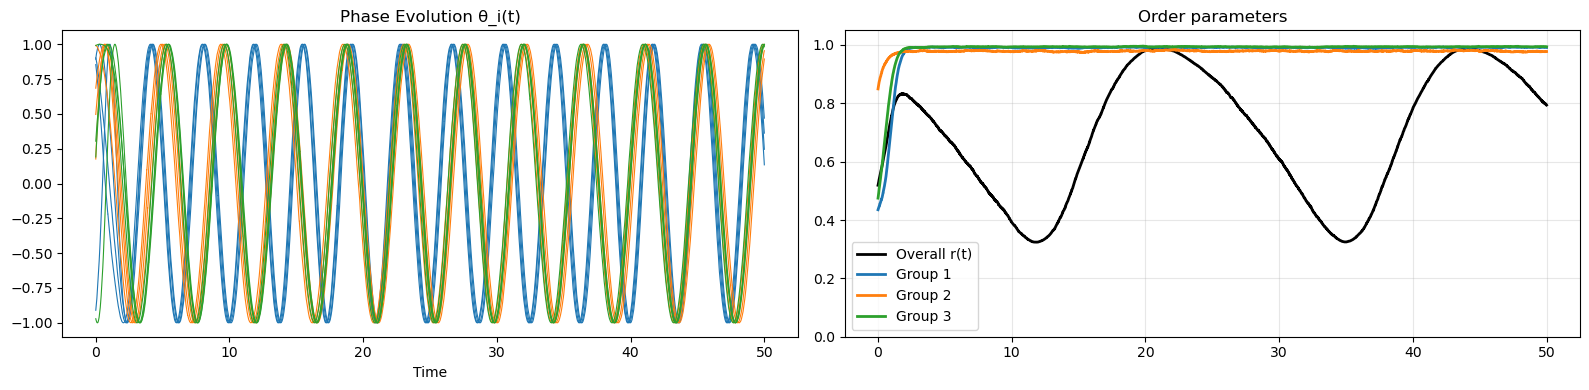

In [130]:
X_embed, theta_hist, t, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=n_clusters,  # 团数
    K_intra=K_intra,   # 团内耦合
    K_inter=K_inter,   # 团间耦合
    noise=noise,
    T=50,
    random_state=0,
    dt=dt
)

x_data = X_embed


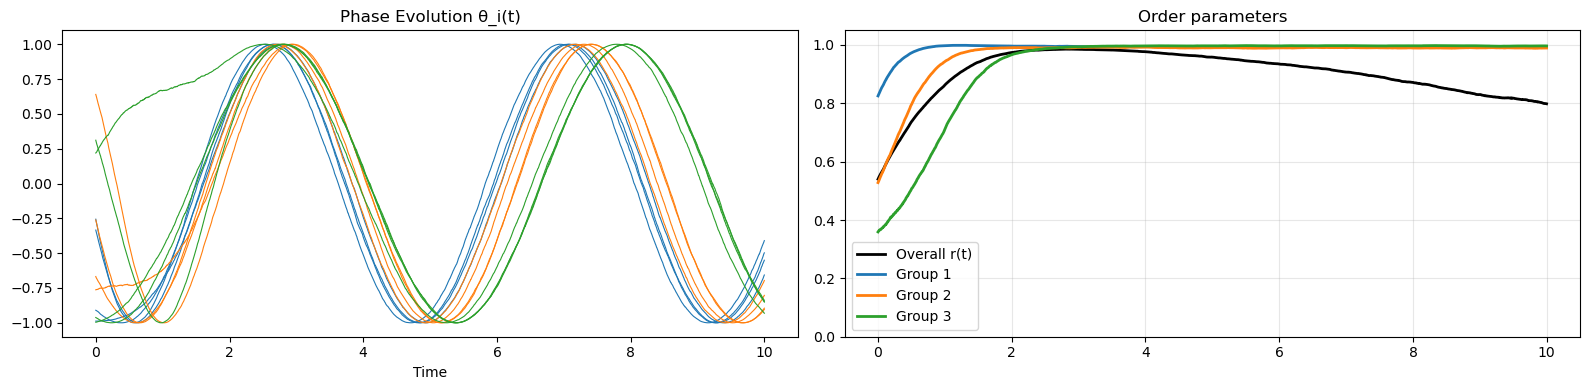

In [132]:
X_embed, theta_hist, t, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=n_clusters,  # 团数
    K_intra=K_intra,   # 团内耦合
    K_inter=K_inter,   # 团间耦合
    noise=noise,
    T=10,
    random_state=42,
    dt=dt
)

x_test = X_embed

# SINDy

In [133]:
sr3_optimizer = ps.SR3(reg_weight_lam=0.1, regularizer="l1")
ode_lib = ps.PolynomialLibrary(degree=1,include_bias=True)
identity_library = ps.IdentityLibrary()
model = ps.SINDy(feature_library=ode_lib, optimizer=sr3_optimizer, discrete_time=False)
model.fit(x_data, t=dt)
model.print()

(x0)' = -1.010 x0 + -0.410 x1 + 0.849 x2 + 0.473 x3 + 0.086 x4 + 0.040 x5 + -0.490 x6 + -0.251 x8 + 0.189 x10 + -0.076 x11 + -2.404 x12 + 0.083 x13 + -0.245 x14 + 0.945 x15 + -0.643 x17 + 0.486 x18 + -0.369 x20 + 1.150 x21 + -1.245 x22 + 0.519 x23
(x1)' = -0.106 x1 + 0.166 x5 + -0.411 x6 + 0.105 x7 + -0.038 x9 + 0.216 x12 + -2.247 x13 + -0.505 x14 + 0.886 x15 + 0.120 x16 + -0.260 x19 + 0.180 x20 + 0.313 x21 + -0.508 x22
(x2)' = 0.074 x0 + 0.024 x1 + -0.178 x2 + -0.233 x3 + 0.017 x5 + -0.392 x6 + 0.162 x7 + -0.062 x9 + -0.248 x10 + 0.427 x11 + 0.342 x12 + -0.586 x13 + -2.096 x14 + 0.611 x15 + 0.083 x16 + -0.267 x17 + 0.359 x20 + 0.177 x21 + -0.391 x22 + -0.076 x23
(x3)' = 0.341 x0 + -0.296 x1 + -0.091 x2 + -0.009 x4 + 0.137 x5 + -0.083 x6 + 0.147 x8 + -0.272 x10 + 0.234 x12 + -0.490 x13 + -1.191 x15 + 0.214 x16 + -0.450 x17 + 0.130 x19 + 0.306 x21 + -0.186 x22 + -0.145 x23
(x4)' = -0.019 x0 + -0.152 x1 + 0.294 x3 + -0.012 x4 + 0.244 x5 + -0.142 x7 + -0.086 x8 + 0.186 x9 + -0.007 x11 + -

In [163]:
from sklearn.linear_model import Lasso
sr3_optimizer = ps.SR3(reg_weight_lam=0.2, regularizer="l1")
lasso_optimizer = Lasso(alpha=0.01, max_iter=2000, fit_intercept=False)

fourier_library = ps.FourierLibrary(n_frequencies=1)
identity_library = ps.IdentityLibrary()
library = identity_library + fourier_library
library_functions = [
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x, y: np.sin(x + y),
    lambda x, y: np.cos(x + y),
]
custom_library = ps.CustomLibrary(library_functions=library_functions)

model = ps.SINDy(feature_library=library, optimizer=sr3_optimizer, discrete_time=False)
model.fit(x_data, t=dt)
model.print()

(x0)' = -0.056 x2 + -0.068 x10 + -1.249 x12 + -0.274 x13 + 0.508 x15 + -0.047 x20 + 0.571 x21 + -0.485 x22 + -0.030 sin(1 x0) + -0.237 sin(1 x1) + -1.822 cos(1 x1) + 0.290 sin(1 x2) + 2.985 cos(1 x2) + 0.189 sin(1 x3) + -0.847 cos(1 x3) + -0.093 cos(1 x5) + -0.216 cos(1 x6) + -0.513 cos(1 x8) + 1.226 cos(1 x10) + -0.668 cos(1 x13) + 1.391 cos(1 x14) + -0.275 cos(1 x15) + -0.423 cos(1 x19) + -0.057 sin(1 x20) + 0.556 cos(1 x20) + 0.170 sin(1 x22) + -0.125 cos(1 x22) + 0.067 cos(1 x23)
(x1)' = -0.214 x6 + 0.053 x8 + -2.105 x13 + -0.168 x14 + 0.640 x15 + -0.032 x19 + -0.159 x22 + -0.084 sin(1 x8) + 0.181 cos(1 x9) + -0.001 cos(1 x21)
(x2)' = 0.003 x0 + -0.111 x2 + -0.120 x3 + -0.416 x6 + 0.044 x11 + -0.362 x13 + -1.648 x14 + 0.563 x15 + -0.138 x22 + -0.375 cos(1 x1) + 0.607 cos(1 x2) + -0.567 cos(1 x3) + 0.022 sin(1 x4) + 0.562 cos(1 x5) + 0.416 cos(1 x6) + 0.138 sin(1 x7) + -1.041 cos(1 x7) + 0.113 cos(1 x9) + 0.315 sin(1 x12) + -0.230 sin(1 x14) + -0.083 cos(1 x15) + -0.215 sin(1 x17) +

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/pysindy/optimizers/sr3.py:374: ConvergenceWarning: SR3 did not converge after 30 iterations.
  warnings.warn(


In [164]:
model.score(x_data, t=dt), model.score(x_test, t=dt)

(0.7948308095170965, 0.7370311295118341)

(24, 48)


<Axes: >

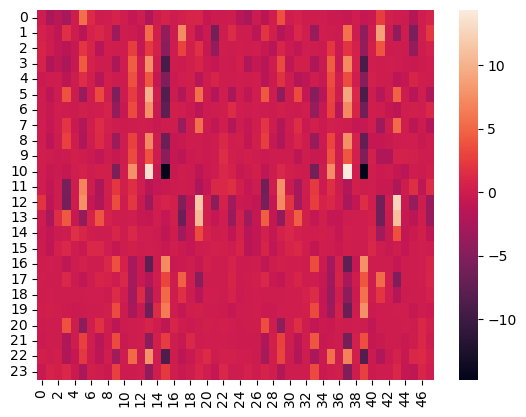

In [156]:
A = model.coefficients()
print(A.shape)
sns.heatmap(model.coefficients())

# 预测

/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_99108/2335028362.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


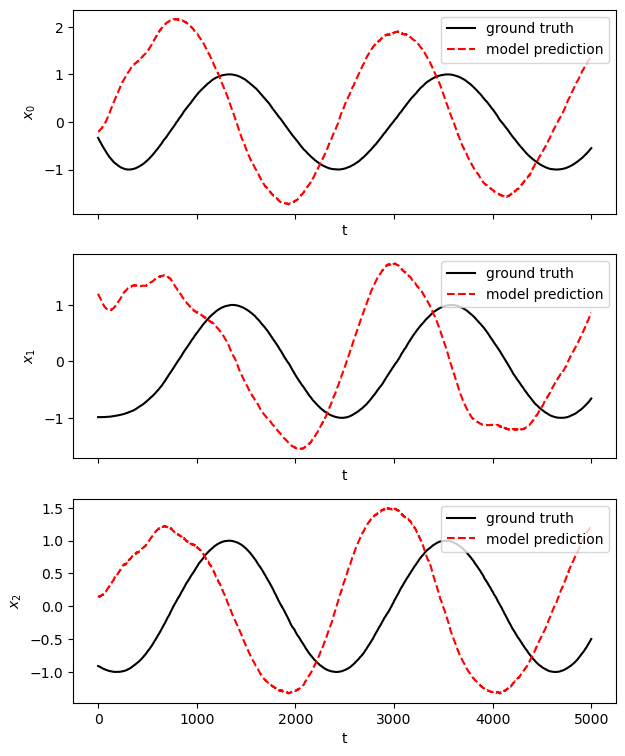

In [157]:
X_test_predicted = model.predict(x_test)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(x_test[:, i], "k", label="ground truth")
    axs[i].plot(X_test_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$x_{}$".format(i))
fig.show()

/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_99108/84222262.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


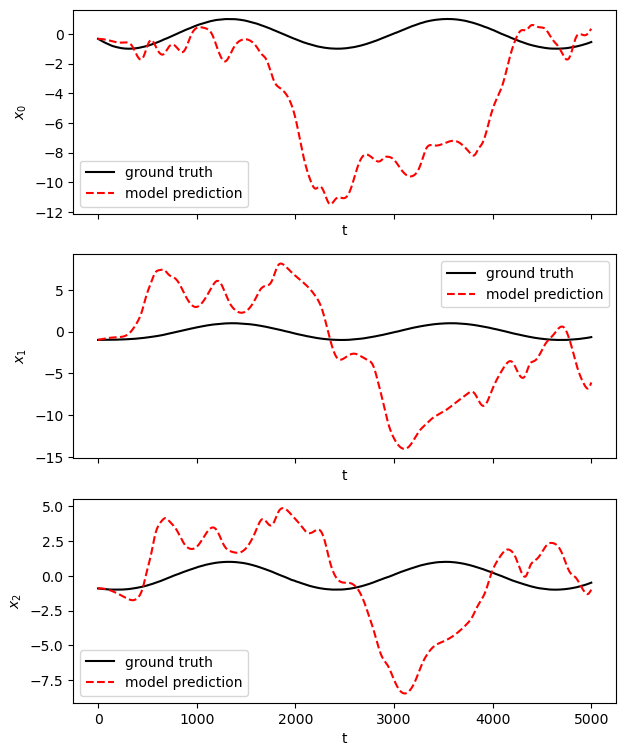

In [158]:
init_data = x_test[0,:]
X_test_predicted = model.simulate(init_data,t)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(x_test[:, i], "k", label="ground truth")
    axs[i].plot(X_test_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$x_{}$".format(i))
fig.show()

# 矩阵稀疏性

In [159]:
from tools import matrix_l0_norm_corrected, matrix_l1_norm_manual
matrix_l1_norm_manual(A.T)

np.float64(112.80484381966602)

In [139]:
matrix_l0_norm_corrected(A.T,0.0)

20

# 特征谱与SVD分析

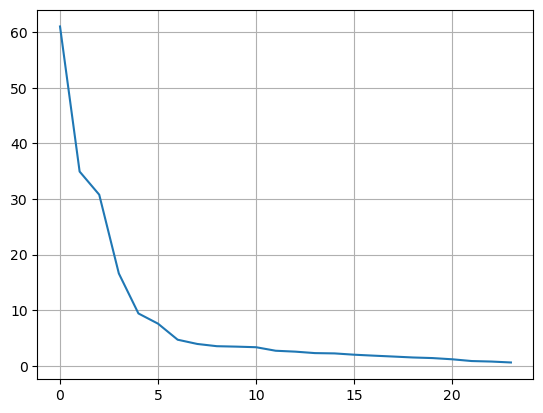

[61.03468879 34.93078538 30.7663145  16.59447158  9.39683768  7.55798076]


In [160]:
U,S,V = np.linalg.svd(A)
plt.figure()
plt.plot(S)
plt.grid(True)
plt.show()
print(S[:6])

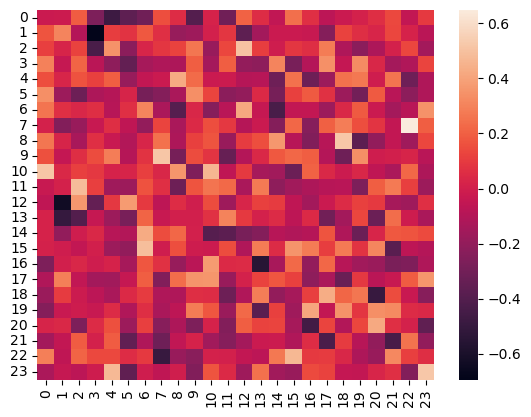

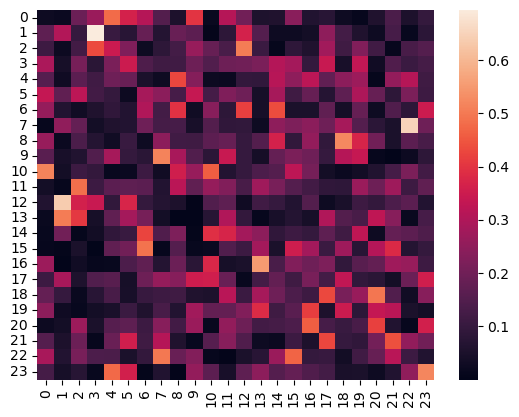

In [161]:
U_abs = np.abs(U)
plt.figure()
sns.heatmap(np.real(U))
plt.show()
plt.figure()
sns.heatmap(U_abs)
plt.show()

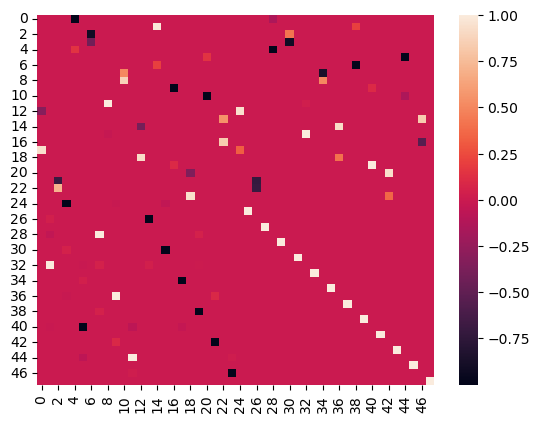

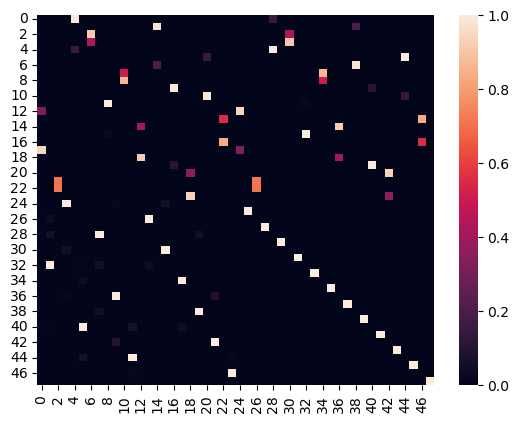

In [114]:
V_abs = np.abs(V)
plt.figure()
sns.heatmap(np.real(V))
plt.show()
plt.figure()
sns.heatmap(V_abs)
plt.show()

In [121]:
import warnings
from contextlib import contextmanager
from copy import copy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso

import pysindy as ps
from pysindy.utils import enzyme
from pysindy.utils import lorenz
from pysindy.utils import lorenz_control

if __name__ != "testing":
    t_end_train = 10
    t_end_test = 15
else:
    t_end_train = 0.04
    t_end_test = 0.04

data = (Path() / "../data").resolve()


@contextmanager
def ignore_specific_warnings():
    filters = copy(warnings.filters)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=LinAlgWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    yield
    warnings.filters = filters


if __name__ == "testing":
    import sys
    import os

    sys.stdout = open(os.devnull, "w")

In [122]:
np.random.seed(100)
integrator_keywords = {}
integrator_keywords["rtol"] = 1e-12
integrator_keywords["method"] = "LSODA"
integrator_keywords["atol"] = 1e-12

In [126]:
# Generate measurement data
dt = 0.002

t_train = np.arange(0, t_end_train, dt)
x0_train = [-8, 8, 27]
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(
    lorenz, t_train_span, x0_train, t_eval=t_train, **integrator_keywords
).y.T

model = ps.SINDy(discrete_time=True)
model.fit(x_train, t=dt)
model.print()

(x0)[k+1] = 1.000 x0[k]
(x1)[k+1] = 1.000 x1[k]
(x2)[k+1] = 1.000 x2[k]


In [127]:
t_test = np.arange(0, t_end_test, dt)
x0_test = np.array([8, 7, 15])
t_test_span = (t_test[0], t_test[-1])
x_test = solve_ivp(
    lorenz, t_test_span, x0_test, t_eval=t_test, **integrator_keywords
).y.T

# Compare SINDy-predicted derivatives with finite difference derivatives
print("Model score: %f" % model.score(x_test, t=dt))

Model score: 0.999766


/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_99108/2661361613.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


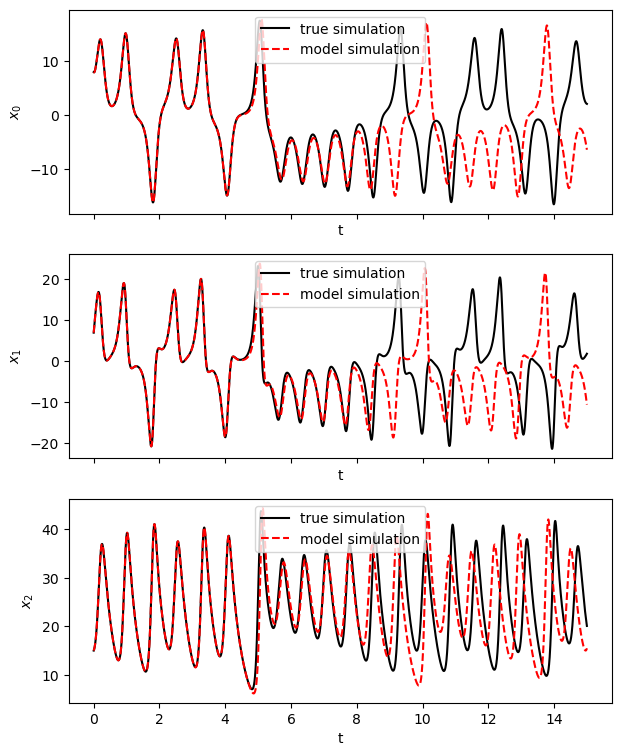

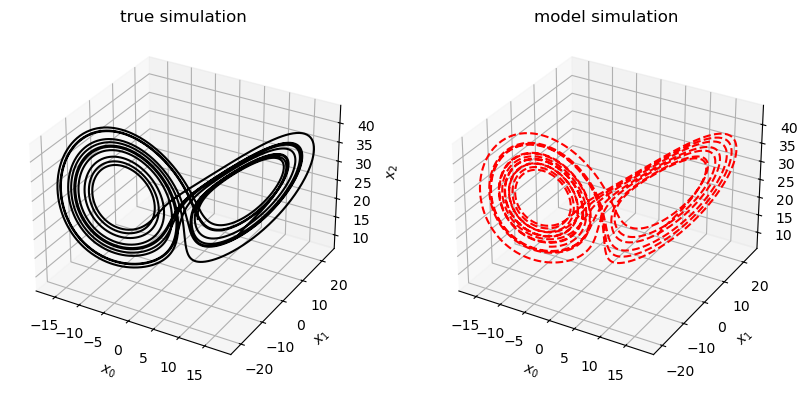

In [125]:
x_test_sim = model.simulate(x0_test, t_test)

fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], "k", label="true simulation")
    axs[i].plot(t_test, x_test_sim[:, i], "r--", label="model simulation")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel="$x_{}$".format(i))

fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2], "k")
ax1.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$", title="true simulation")

ax2 = fig.add_subplot(122, projection="3d")
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1], x_test_sim[:, 2], "r--")
ax2.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$", title="model simulation")

fig.show()